In [ ]:
!pip install yfinance pandas prophet matplotlib sklearn

Please enter the stock symbol (e.g., 'AMZN' for Amazon): AAPL

Download complete.

Preprocessing data for Prophet...
Preprocessing complete.

Splitting data into training and testing sets...
Splitting complete.

Training Prophet model...


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbdst_686/k19kzbgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbdst_686/f041z59_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58434', 'data', 'file=/tmp/tmpbdst_686/k19kzbgo.json', 'init=/tmp/tmpbdst_686/f041z59_.json', 'output', 'file=/tmp/tmpbdst_686/prophet_model9x9pud7h/prophet_model-20230615200453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:04:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:04:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training complete.

Forecasting future stock prices...
Forecasting complete.

Calculating forecast accuracy...
Mean Absolute Error (MAE): 36.9605715760907
Root Mean Squared Error (RMSE): 40.228076853554576
Mean Absolute Percentage Error (MAPE): 22.257097394568106%



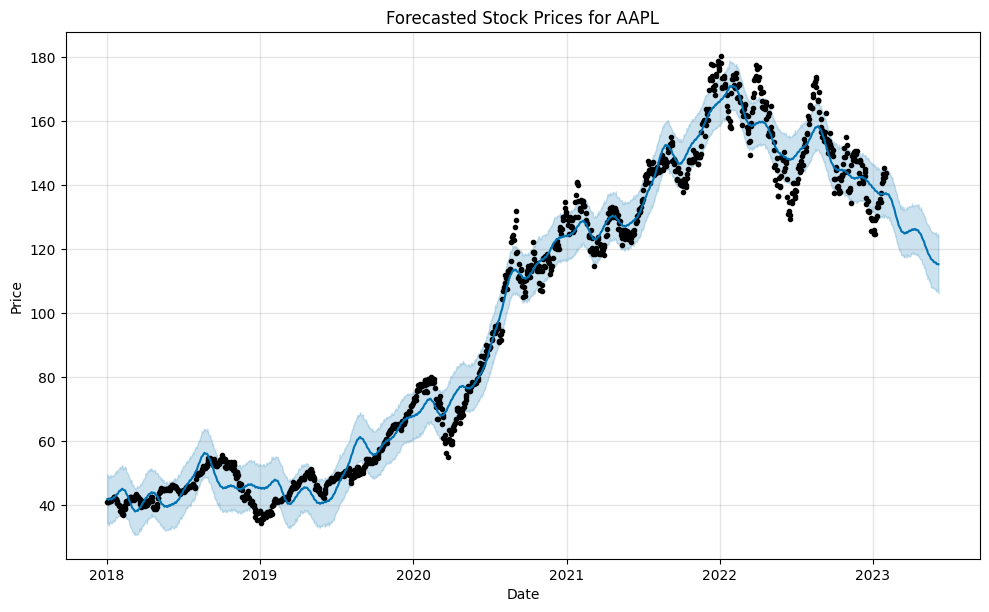

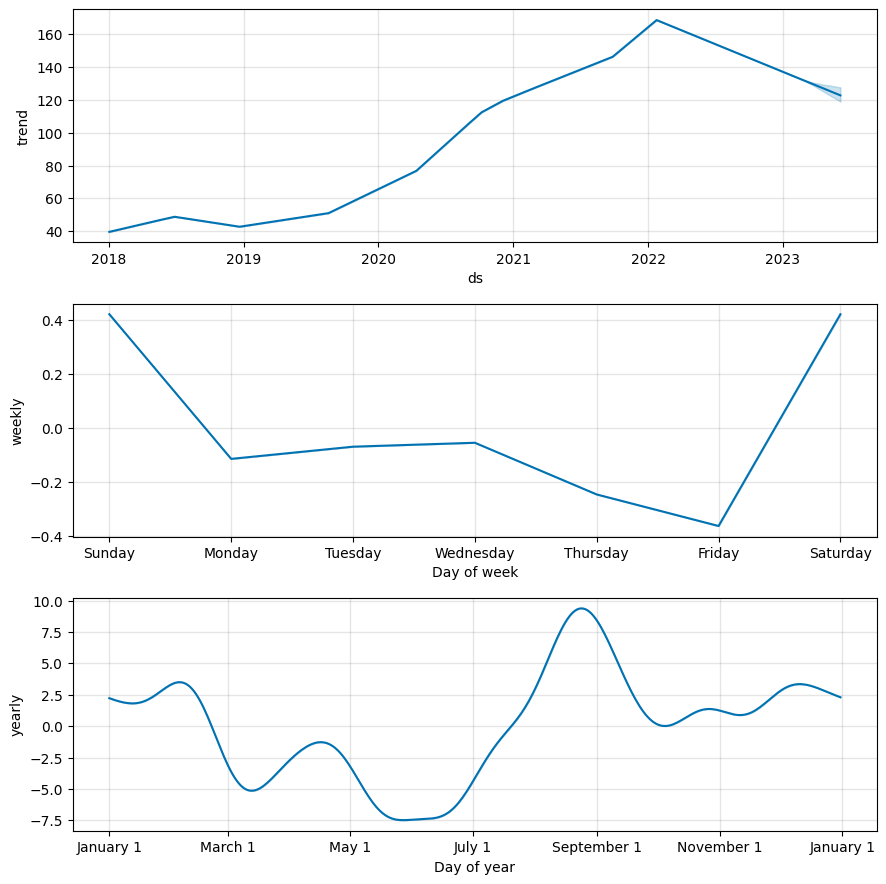

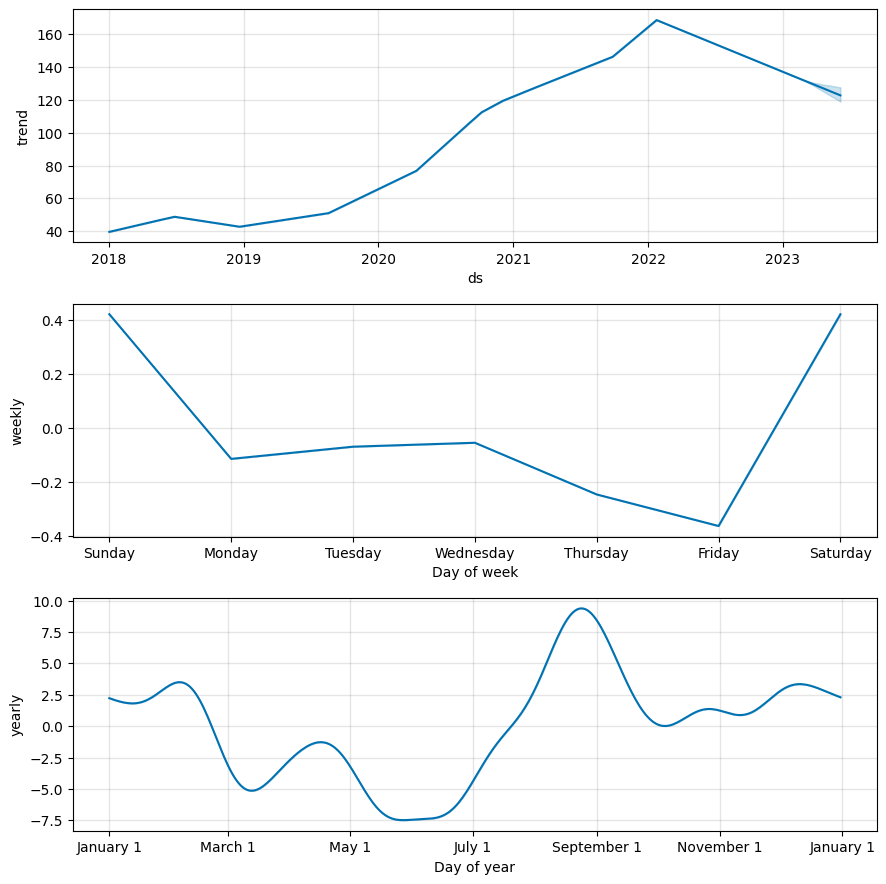

In [1]:
# Import necessary packages
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

# Ask the user for the stock they're interested in
stock_symbol = input("Please enter the stock symbol (e.g., 'AMZN' for Amazon): ")

# Download historical stock data using Yahoo Finance
print(f"\nDownloading historical data for {stock_symbol}...")
stock = yf.Ticker(stock_symbol)
data = stock.history(start="2018-01-01", end="2023-06-12", interval="1d")
data.reset_index(inplace=True)
print("Download complete.\n")

# Rename the columns to fit Prophet's expected format
print("Preprocessing data for Prophet...")
df_prophet = data.rename(columns={'Date': 'ds', 'Close': 'y'})

# Prophet requires timestamps to be timezone-unaware
df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)

# Exclude weekends from data because stock markets are closed
df_prophet = df_prophet[df_prophet['ds'].dt.dayofweek < 5]
print("Preprocessing complete.\n")

# Split data into train and test sets, reserve last 90 days for testing
print("Splitting data into training and testing sets...")
train = df_prophet.iloc[:-90, :]
test = df_prophet.iloc[-90:, :]
print("Splitting complete.\n")

# Initialize and fit the model to the training data
print("Training Prophet model...")
m = Prophet()
m.fit(train)
print("Training complete.\n")

# Predict future stock prices for the next 90 business days
print("Forecasting future stock prices...")
future = m.make_future_dataframe(periods=90, freq='B') # 'B' for business days
forecast = m.predict(future)
print("Forecasting complete.\n")

# Calculate and display error metrics for our forecast on the test set
print("Calculating forecast accuracy...")
y_true = test['y'].values
y_pred = forecast.iloc[-90:]['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%\n")

# Plot the forecasted stock prices
m.plot(forecast)
plt.title(f"Forecasted Stock Prices for {stock_symbol}")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot the components of the forecast (trend, yearly seasonality, and weekly seasonality)
m.plot_components(forecast)